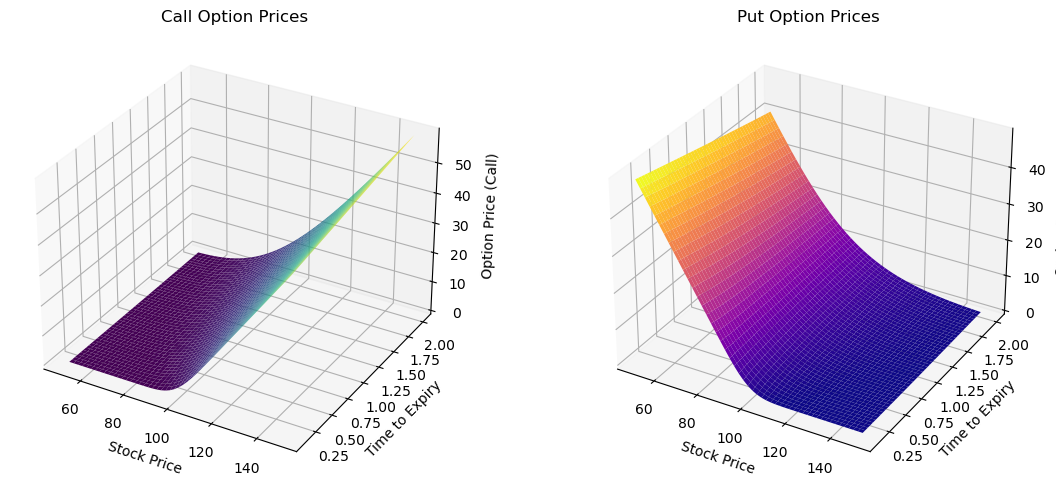

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

def black_scholes_merton(S, K, T, r, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Define ranges for stock prices and time to expiration
stock_prices = np.linspace(50, 150, 50)  # Stock prices from 50 to 150
time_to_expiry = np.linspace(0.1, 2, 50)  # Time to expiration from 0.1 to 2 years

# Create a grid of stock prices and time to expiration
S, T = np.meshgrid(stock_prices, time_to_expiry)

# Parameters
strike_price = 100
risk_free_rate = 0.05
volatility = 0.2

# Calculate call option prices for the grid of stock prices and time to expiration
call_option_prices = black_scholes_merton(S, strike_price, T, risk_free_rate, volatility, 'call')

# Calculate put option prices for the grid of stock prices and time to expiration
put_option_prices = black_scholes_merton(S, strike_price, T, risk_free_rate, volatility, 'put')

# Create 3D plot for Call Option Prices
fig = plt.figure(figsize=(12, 5))

# Plot for Call Option Prices
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(S, T, call_option_prices, cmap='viridis')
ax1.set_title('Call Option Prices')
ax1.set_xlabel('Stock Price')
ax1.set_ylabel('Time to Expiry')
ax1.set_zlabel('Option Price (Call)')

# Plot for Put Option Prices
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(S, T, put_option_prices, cmap='plasma')
ax2.set_title('Put Option Prices')
ax2.set_xlabel('Stock Price')
ax2.set_ylabel('Time to Expiry')
ax2.set_zlabel('Option Price (Put)')

plt.tight_layout()
plt.show()

In [2]:
#Without Divident
from scipy.stats import norm

def black_scholes_merton(S, K, T, r, sigma, option_type):
    """
    Calculates the Black-Scholes-Merton option price for European call or put options.
    
    Parameters:
    S : float - Current stock price
    K : float - Option's strike price
    T : float - Time to expiration (in years)
    r : float - Risk-free interest rate
    sigma : float - Volatility of the underlying stock
    option_type : str - 'call' or 'put' to specify the option type
    
    Returns:
    float - Option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Example usage:
stock_price = 100   # Current stock price
strike_price = 110  # Option's strike price
time_to_expiry = 1  # Time to expiration in years
risk_free_rate = 0.05  # Risk-free interest rate
volatility = 0.2  # Volatility of the underlying stock

# Calculate call option price
call_option_price = black_scholes_merton(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, 'call')
print(f"Call Option Price: {call_option_price:.2f}")

# Calculate put option price
put_option_price = black_scholes_merton(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, 'put')
print(f"Put Option Price: {put_option_price:.2f}")

#Call Option Prices Plot: 
#The first 3D plot represents the relationship between call option prices, stock prices (on the x-axis), and time to expiry (on the y-axis). 
#As the stock price and time to expiry change, the value of the call option fluctuates. Higher stock prices or longer time to expiry generally lead to higher call option prices
#Put option price plot:
#put option prices tend to rise when stock prices decrease or as the time to expiry extends.
#Both plots provide a visual understanding of how call and put option prices change concerning variations in stock prices and time to expiry.

Call Option Price: 6.04
Put Option Price: 10.68


In [3]:
#With Divident
from scipy.stats import norm

def black_scholes_merton_dividend(S, K, T, r, sigma, q, option_type):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Example usage:
current_stock_price = 100   # Current stock price
strike_price = 110  # Option's strike price
time_to_expiry = 1  # Time to expiration in years
risk_free_rate = 0.05  # Risk-free interest rate
volatility = 0.2  # Volatility of the underlying stock
dividend_yield = 0.05  # Dividend yield

# Calculate call option price with dividend yield adjustment
call_option_price_with_dividend = black_scholes_merton_dividend(current_stock_price,strike_price,
time_to_expiry, risk_free_rate, volatility, dividend_yield, 'call')

# Calculate put option price with dividend yield adjustment
put_option_price_with_dividend = black_scholes_merton_dividend(current_stock_price, strike_price,time_to_expiry, risk_free_rate, volatility, dividend_yield, 'put')

print(f"Call Option Price with Dividend Yield Adjustment: {call_option_price_with_dividend:.2f}")
print(f"Put Option Price with Dividend Yield Adjustment: {put_option_price_with_dividend:.2f}")

#Call Option with Dividend Yield: When a dividend is expected on the underlying stock, it can affect the pricing of call options. Typically, a dividend payment reduces the stock price by the amount of the dividend before the ex-dividend date. 
#This reduction in the stock price impacts the call option price, particularly reducing it because the stock price decreases due to the dividend payout.
#Put Option with Dividend Yield: Dividend yield can also influence put option prices. Generally, if a stock pays dividends, the put option holder might anticipate lower dividends as the stock price drops after the ex-dividend date. 
#This anticipation could impact the put option price, potentially increasing it due to the expected decline in stock price.

Call Option Price with Dividend Yield Adjustment: 4.08
Put Option Price with Dividend Yield Adjustment: 13.59
